In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
application_data = pd.read_csv("C:/Users/Dell/Downloads/application_data.csv")

# CLEANING THE DATASET

In [5]:
application_data.shape

(49999, 122)

In [6]:
null_cols = application_data.isnull().sum() / 49999*100

Text(0.5, 1.0, 'PERCENTAGE OF NULL VALUES IN EACH COLUMNS')

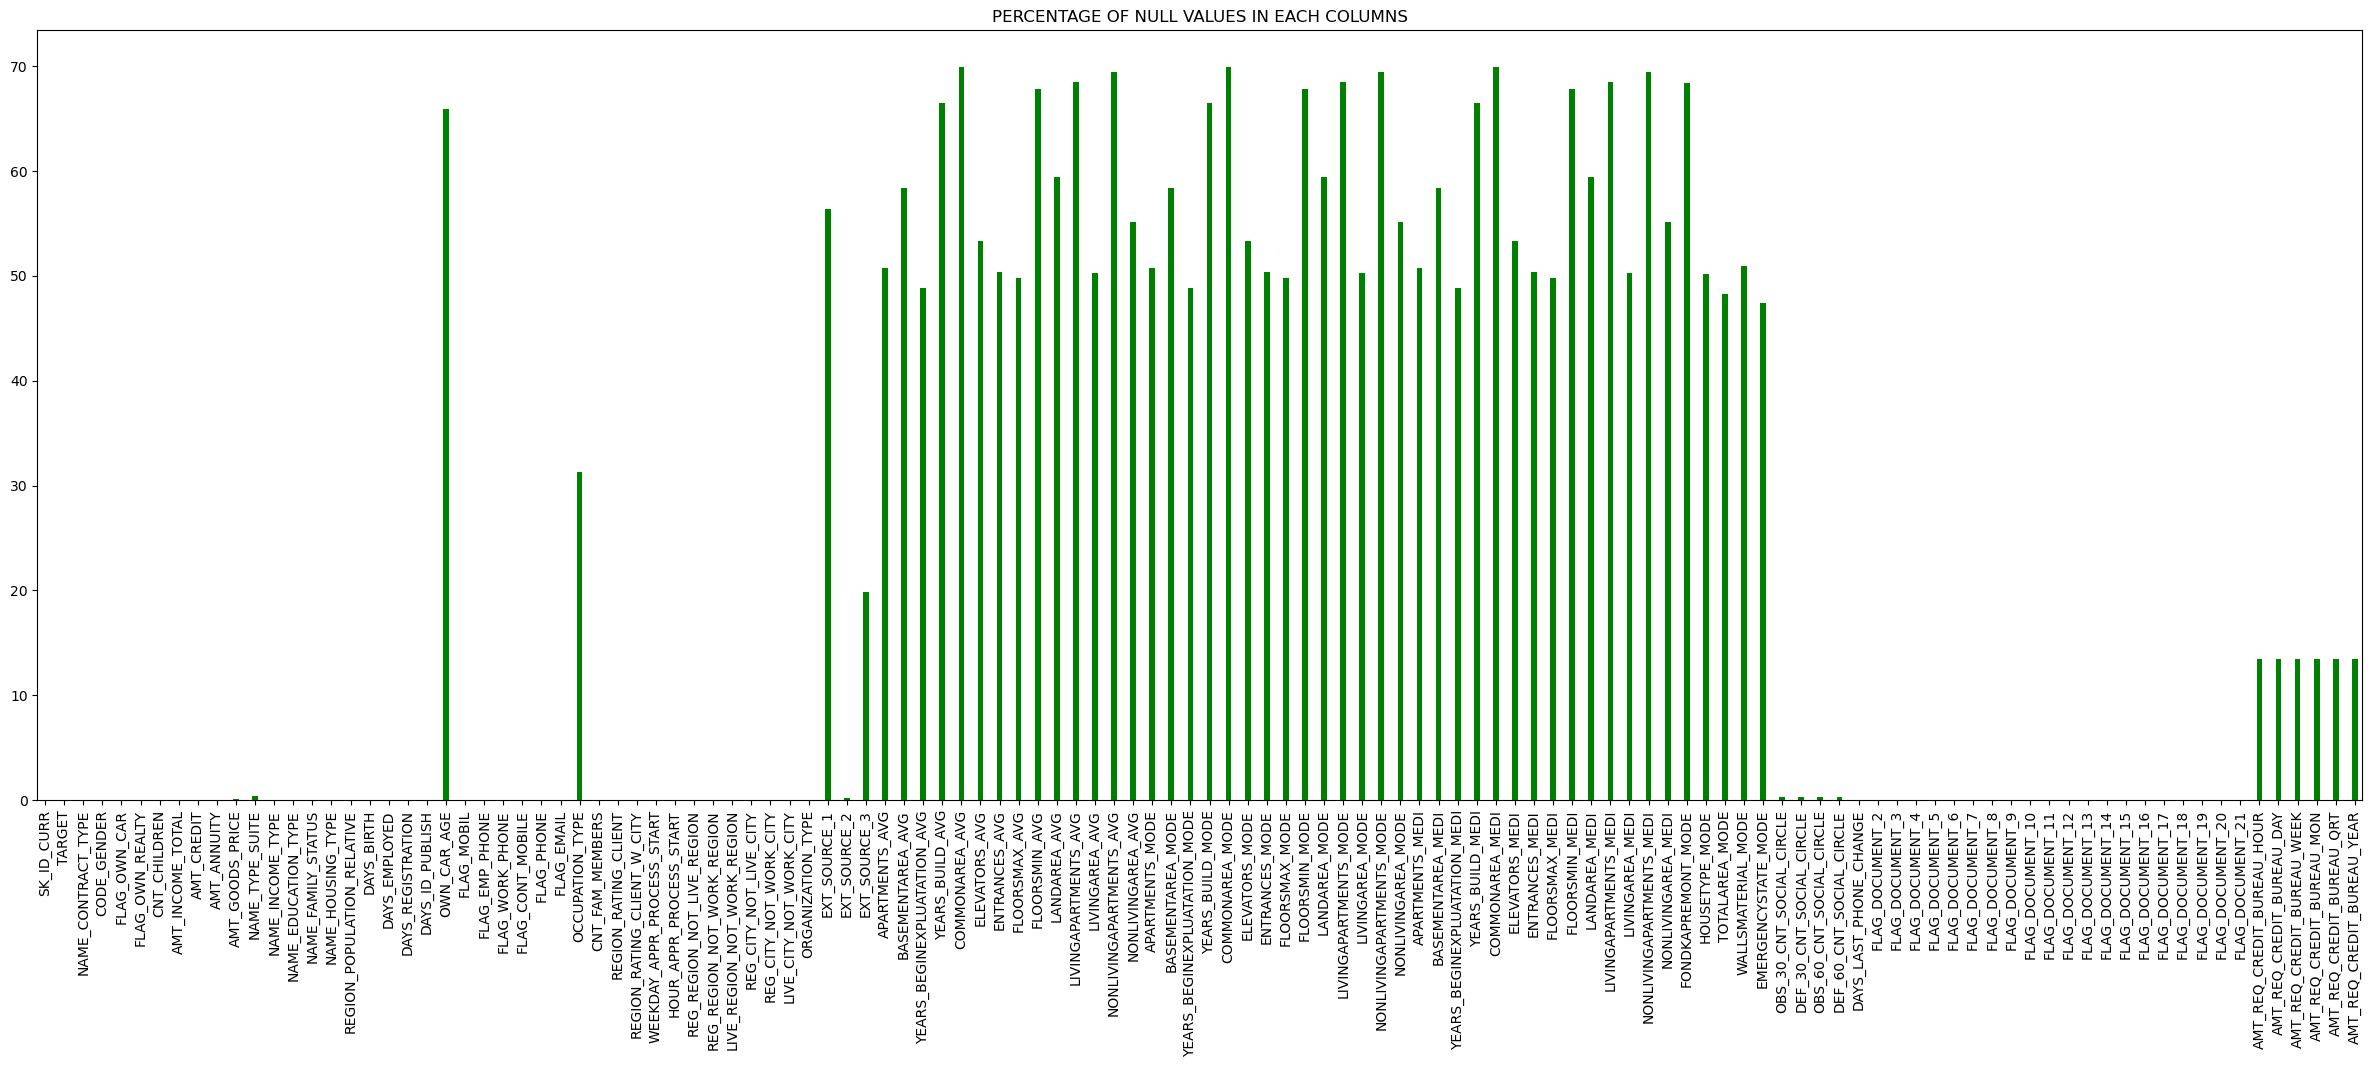

In [8]:
fig, ax = plt.subplots(figsize=(30,10))
null_cols.plot(kind='bar', x='COLUMN NAME', y='EMPTY VALUES (%)', color='green', width=0.3, ax=ax)
ax.set_title('PERCENTAGE OF NULL VALUES IN EACH COLUMNS')

## _COLUMNS WITH MORE THAT 40% EMPTY VALUES WERE THEN REMOVED_

In [9]:
margin = 40
cols_to_drop = null_cols[null_cols > margin].index

In [10]:
application_data.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
application_data.shape

(49999, 73)

## _COLUMNS WITH FACTORS IRRELEVANT FOR ANALYSIS WERE ALSO DROPPED_

These factors were decided upon by looking at the columns_description dataset

In [16]:
application_data.drop(['HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
'FLAG_PHONE', 'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE',
'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_3'], axis=1, inplace=True)

In [17]:
application_data.shape

(49999, 25)

In [20]:
pd.set_option('display.max_rows', None)
application_data.isnull().sum().sort_values()

SK_ID_CURR                         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
DAYS_ID_PUBLISH                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
REG_CITY_NOT_LIVE_CITY             0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
TARGET                             0
NAME_INCOME_TYPE                   0
ORGANIZATION_TYPE                  0
AMT_ANNUITY                        1
CNT_FAM_MEMBERS                    1
OCCUPATION_TYPE                15654
dtype: int64

In [22]:
application_data['AMT_ANNUITY'].describe()

count     49998.000000
mean      27107.377355
std       14562.944435
min        2052.000000
25%       16456.500000
50%       24939.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [23]:
application_data['AMT_ANNUITY'].fillna(27107, inplace=True)

In [24]:
application_data['CNT_FAM_MEMBERS'].describe()

count    49998.000000
mean         2.158946
std          0.911332
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [25]:
application_data['CNT_FAM_MEMBERS'].fillna(2, inplace=True)

In [26]:
application_data['OCCUPATION_TYPE'].describe()

count        34345
unique          18
top       Laborers
freq          8952
Name: OCCUPATION_TYPE, dtype: object

In [29]:
application_data['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)

In [30]:
pd.set_option('display.max_rows', None)
application_data.isnull().sum().sort_values()

SK_ID_CURR                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
OCCUPATION_TYPE                0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
NAME_HOUSING_TYPE              0
REG_CITY_NOT_LIVE_CITY         0
NAME_FAMILY_STATUS             0
NAME_INCOME_TYPE               0
AMT_ANNUITY                    0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_CONTRACT_TYPE             0
TARGET                         0
NAME_EDUCATION_TYPE            0
ORGANIZATION_TYPE              0
dtype: int64

# ANALYSIS

## _OUTLIERS IN THE DATASET_

In [32]:
def outliers_func(dataframe, column_name):
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = [x for x in dataframe[column_name] if x <= lower_bound or x >= upper_bound]
    return outliers

CNT_CHILDREN : column signyfying the number of children under the applicant's care

In [33]:
outliers1 = outliers_func(application_data, 'CNT_CHILDREN')
application_data['isoutlierCNT_CHILDREN'] = application_data['CNT_CHILDREN'].apply(lambda x: 'yes' if x in outliers1 else 'no')

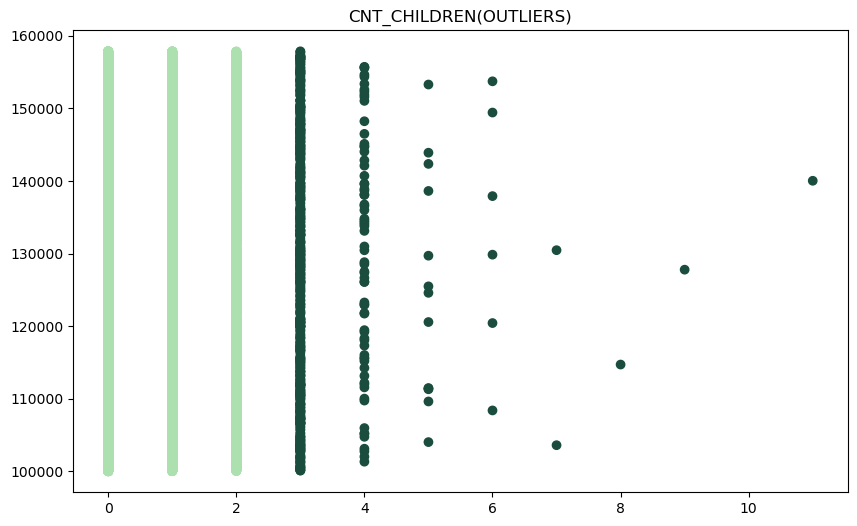

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = np.where(application_data['isoutlierCNT_CHILDREN']=="yes", '#1B4D3E','#ACE1AF')
ax.scatter(application_data['CNT_CHILDREN'], application_data['SK_ID_CURR'], c=colors)
plt.title('CNT_CHILDREN(OUTLIERS)')
plt.show()

CNT_FAM_MEMEBERS : Number of family members the applicant has

In [37]:
outliers2 = outliers_func(application_data, 'CNT_FAM_MEMBERS')
application_data['isoutlierCNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].apply(lambda x: 'yes' if x in outliers2 else 'no')

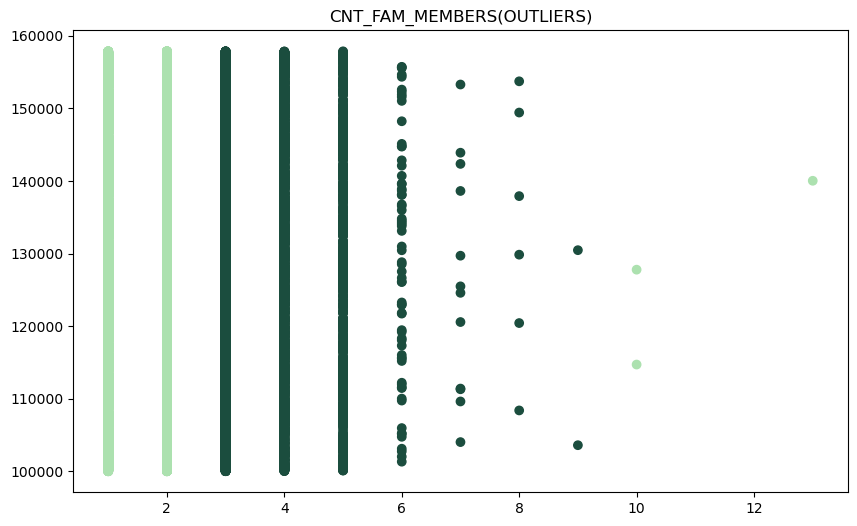

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = np.where(application_data['isoutlierCNT_FAM_MEMBERS']=="yes", '#1B4D3E','#ACE1AF')
ax.scatter(application_data['CNT_FAM_MEMBERS'], application_data['SK_ID_CURR'], c=colors)
plt.title('CNT_FAM_MEMBERS(OUTLIERS)')
plt.show()

AMT_INCOME_TOTAL : column which corresponds to the applicant's total income

In [40]:
outliers3 = outliers_func(application_data, 'AMT_INCOME_TOTAL')
application_data['isoutlierAMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL'].apply(lambda x: 'yes' if x in outliers3 else 'no')

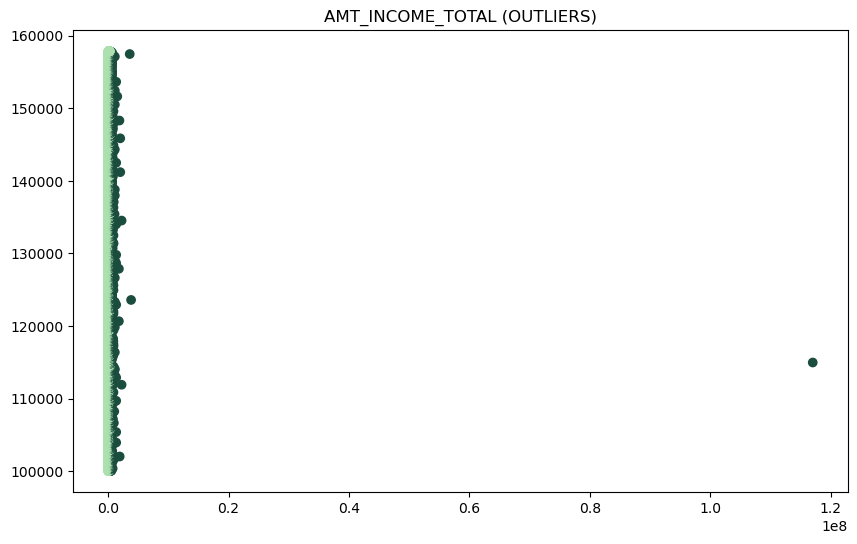

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = np.where(application_data['isoutlierAMT_INCOME_TOTAL']=="yes", '#1B4D3E','#ACE1AF')
ax.scatter(application_data['AMT_INCOME_TOTAL'], application_data['SK_ID_CURR'], c=colors)
plt.title('AMT_INCOME_TOTAL (OUTLIERS)')
plt.show()

DAYS_EMPLOYED : columns which denotes the number of days an applicant has worked

In [42]:
outliers4 = outliers_func(application_data, 'DAYS_EMPLOYED')
application_data['isoutlierDAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].apply(lambda x: 'yes' if x in outliers4 else 'no')

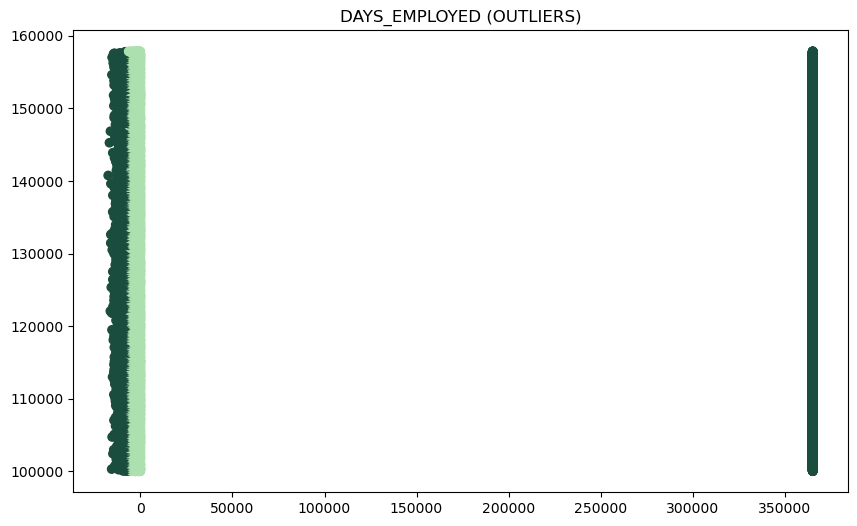

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = np.where(application_data['isoutlierDAYS_EMPLOYED']=="yes", '#1B4D3E','#ACE1AF')
ax.scatter(application_data['DAYS_EMPLOYED'], application_data['SK_ID_CURR'], c=colors)
plt.title('DAYS_EMPLOYED (OUTLIERS)')
plt.show()

## _DATA IMBALANCE IN THE TARGET VARIABLE_

In [44]:
class_counts = application_data['TARGET'].value_counts()
print(class_counts)

TARGET
0    45973
1     4026
Name: count, dtype: int64


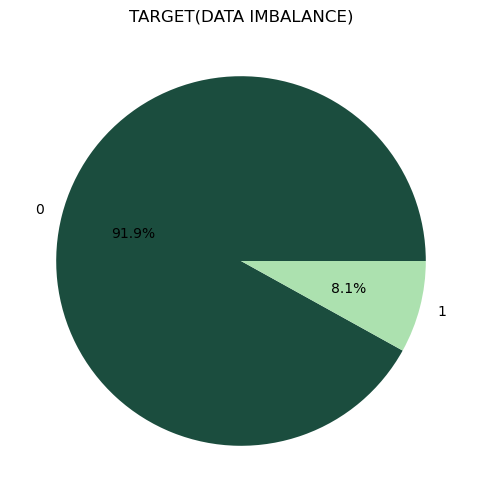

In [45]:
plt.figure(figsize=(10, 6))
colors = ['#1B4D3E','#ACE1AF']
plt.pie(class_counts, labels = class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('TARGET(DATA IMBALANCE)')
plt.show()

## _CORRELATION MATRICES BASED ON THE TARGET VARIABLE_

In [46]:
NumericValues_col_name = application_data.select_dtypes( include =[ 'float64','int64']).columns
NumericValues = application_data[NumericValues_col_name]

In [47]:
difficulties = NumericValues[NumericValues['TARGET']==1]

In [50]:
difficulties_correlation = difficulties.corr()
top_correlations_difficulties = difficulties_correlation.unstack().sort_values(ascending=False)
top_correlations_difficulties = top_correlations_difficulties[top_correlations_difficulties.index.get_level_values(0) !=
top_correlations_difficulties.index.get_level_values(1)]
print(top_correlations_difficulties.head(10))

REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950769
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950769
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.892522
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.892522
AMT_CREDIT                   AMT_ANNUITY                    0.749665
AMT_ANNUITY                  AMT_CREDIT                     0.749665
DAYS_BIRTH                   DAYS_REGISTRATION              0.288438
DAYS_REGISTRATION            DAYS_BIRTH                     0.288438
DAYS_BIRTH                   CNT_CHILDREN                   0.249673
CNT_CHILDREN                 DAYS_BIRTH                     0.249673
dtype: float64


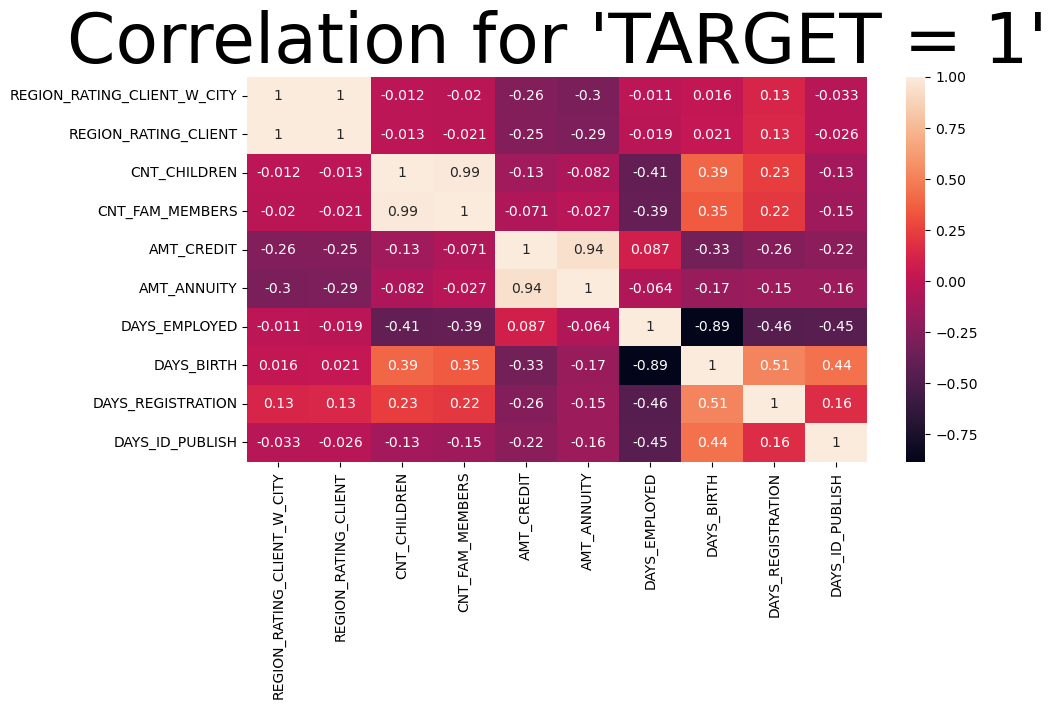

In [52]:
cols = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_CREDIT',
'AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
selected_columns = difficulties_correlation[cols]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation for 'TARGET = 1'", fontsize=50)
plt.show()

In [53]:
other_cases = NumericValues[NumericValues['TARGET']==0]

In [54]:
other_cases_correlation = other_cases.corr()
top_other_cases = other_cases_correlation.unstack().sort_values(ascending=False)
top_other_cases = top_other_cases[top_other_cases.index.get_level_values(0) != top_other_cases.index.get_level_values(1)]
print(top_other_cases.head(10))

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950468
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950468
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879238
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879238
AMT_CREDIT                   AMT_ANNUITY                    0.770772
AMT_ANNUITY                  AMT_CREDIT                     0.770772
                             AMT_INCOME_TOTAL               0.451136
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.451136
                             AMT_CREDIT                     0.377966
AMT_CREDIT                   AMT_INCOME_TOTAL               0.377966
dtype: float64


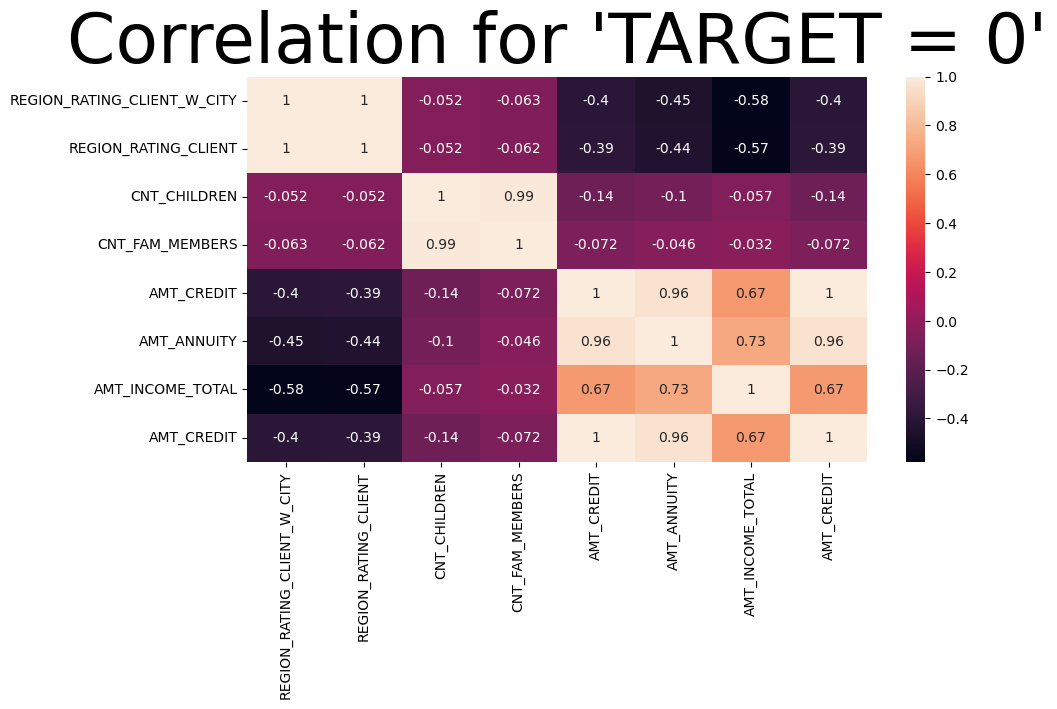

In [55]:
cols = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_CREDIT',
'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT']
selected_columns = other_cases_correlation[cols]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation for 'TARGET = 0'", fontsize=50)
plt.show()